In [1]:
# P. Barry Seavey
# PRED 454-55, Winter 2018
# project 2
# kaggle.com 'Facial Keypoints Detection'

In [2]:
# --- EDA ---

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.utils import shuffle

In [5]:
import os
print(os.listdir('../Facial Keypoints'))

['.ipynb_checkpoints', '15_pt_1.PNG', '4_pt_1.PNG', 'clean-white-brick-wall-textures-plain-820x532.jpg', 'CNN2_128-500-500-30_v1.h5', 'CNN_500-90-30_v2.h5', 'CNN_500-90-30_v5.h5', 'df_dump.PNG', 'face_model.h5', 'Fac_Kpt_1stCNNModel.ipynb', 'Fac_Kpt_1stModel.ipynb', 'Fac_Kpt_CNN-num2-Copy1.ipynb', 'Fac_Kpt_CNN-num2.ipynb', 'Fac_Kpt_EDA1.ipynb', 'Fac_Kpt_img-extraction.ipynb', 'Fac_Kpt_nullpredict.ipynb', 'FKPt - imputedata1.ipynb', 'FKPt_CNN-batchnorm.ipynb', 'IdLookupTable.csv', 'imgs', 'KPT_500-90-30.h5', 'model2_v1.csv', 'nigel.jpg', 'pic1.png', 'SampleSubmission.csv', 'Screen_Caps', 'Seavey_base_500-90-30_v2.csv', 'Seavey_base_500-90-30_v3.csv', 'Seavey_base_500-90-30_v4.csv', 'Seavey_m2_v1.csv', 'test.csv', 'test.zip', 'training.csv', 'training.zip', 'training_augmented.csv', 'train_nulls.csv']


In [6]:
#

In [7]:
FROOT = os.getcwd() # Path to your project folder
FTRAIN = FROOT + '/training.csv'
FTEST = FROOT + '/test.csv'
FLOOKUP = FROOT + '/IdLookupTable.csv'

In [8]:
def load(test = False, cols = None):
    """
    Loads the dataset.
    
    Parameters
    ----------
    test  : optional, defaults to `False`
            Flag indicating if we need to load from `FTEST` (`True`) or `FTRAIN` (`False`)
    cols  : optional, defaults to `None`
            A list of columns you're interested in. If specified only returns these columns.
               
    Returns
    -------
    A tuple of X and y, if `test` was set to `True` y contains `None`.    
    """
    
    fname = FTEST if test else FTRAIN
    df = pd.read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep = ' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them
    columns = df.columns

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=123)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y, columns

In [9]:
def plt_sample(num):
    img = X[num].reshape(96, 96)
    #
    plt.imshow(img, cmap='gray')
    plt.scatter(y[num][0::2] * 48 + 48, y[num][1::2] * 48 + 48, marker='x', s=10, color='red')

In [10]:
X, y, columns = load()  # loads train data only

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [11]:
columns = np.array(list(columns[:-1]))

In [12]:
X.shape

(2140, 9216)

In [13]:
y.shape

(2140, 30)

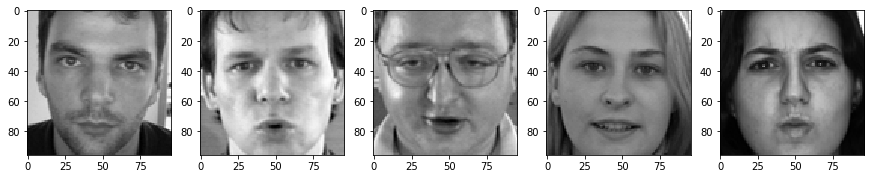

In [16]:
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = X[i].reshape(96, 96)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

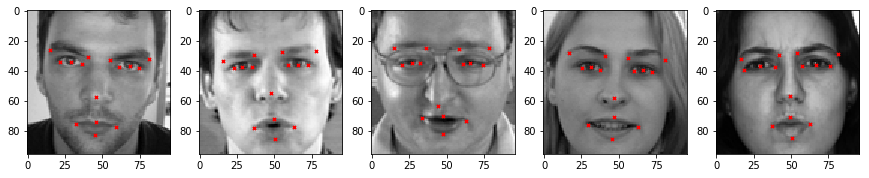

In [17]:
fig = plt.figure(figsize=(18, 18))

for i in range(1, 6):
    axis = fig.add_subplot(1, 6, i+1)
    plt_sample(i)
    #plt.scatter(y[i][0::2] * 48 + 48, y[i][1::2] * 48 + 48, marker='x', s=10, color='red')

plt.show()

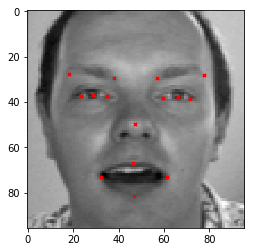

In [18]:
plt_sample(11)

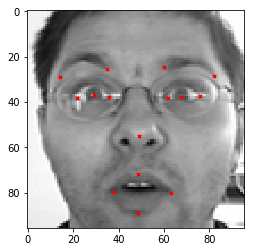

In [19]:
plt_sample(171)

In [21]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D

Using TensorFlow backend.


In [22]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(96*96,)))
model.add(Activation('relu'))
model.add(Dense(30))

In [23]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 100
history = model.fit(X, y, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s - loss: 0.0359 - acc: 0.5648 - val_loss: 0.0119 - val_acc: 0.6308
Epoch 2/100
1712/1712 [==============================] - 1s - loss: 0.0111 - acc: 0.6402 - val_loss: 0.0093 - val_acc: 0.6519
Epoch 3/100
1712/1712 [==============================] - 1s - loss: 0.0093 - acc: 0.6595 - val_loss: 0.0102 - val_acc: 0.6729
Epoch 4/100
1712/1712 [==============================] - 1s - loss: 0.0086 - acc: 0.6723 - val_loss: 0.0084 - val_acc: 0.6565
Epoch 5/100
1712/1712 [==============================] - 1s - loss: 0.0080 - acc: 0.6746 - val_loss: 0.0081 - val_acc: 0.6612
Epoch 6/100
1712/1712 [==============================] - 1s - loss: 0.0072 - acc: 0.6787 - val_loss: 0.0084 - val_acc: 0.6565
Epoch 7/100
1712/1712 [==============================] - 1s - loss: 0.0070 - acc: 0.6840 - val_loss: 0.0085 - val_acc: 0.6799
Epoch 8/100
1712/1712 [==============================] - 1s - loss: 0.0

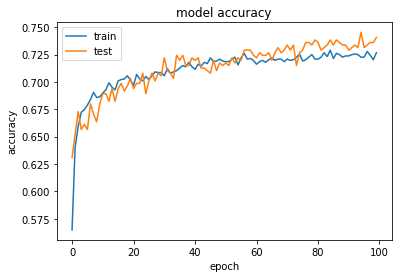

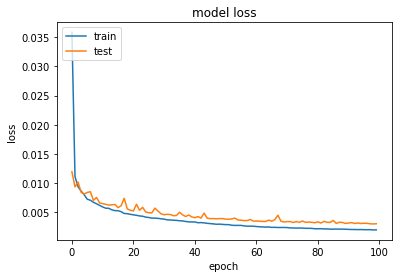

In [24]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

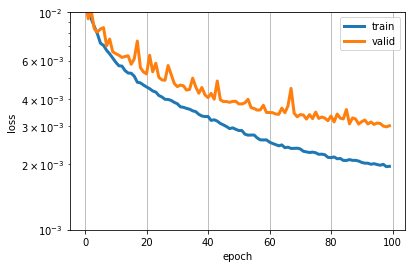

In [26]:
plt.plot(history.history['loss'], linewidth=3, label='train')
plt.plot(history.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(1e-3, 1e-2)
plt.yscale('log')
plt.show()

In [61]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10, color='yellow')

ImageId    1783
Image      1783
dtype: int64


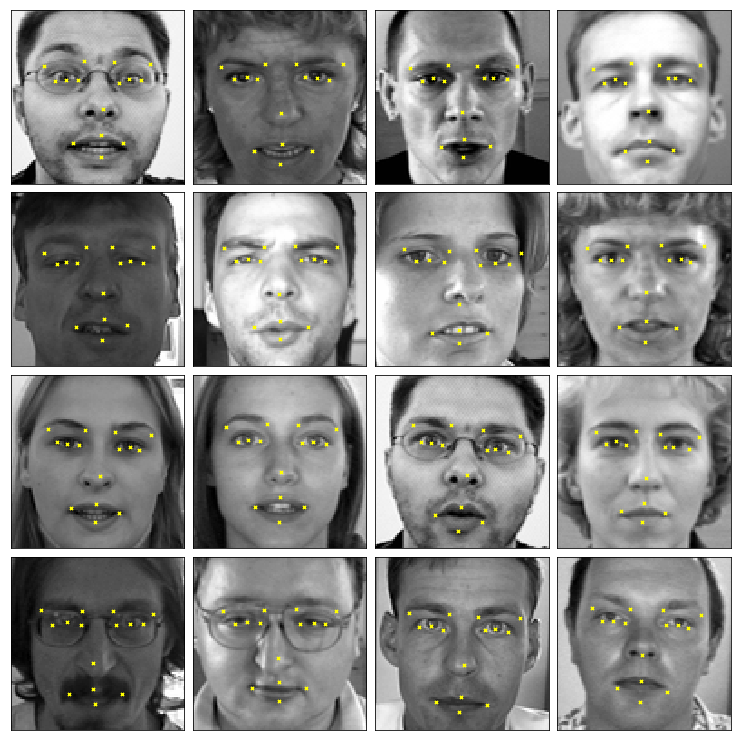

In [28]:
X_test, _ = load(test=True)
y_test = model.predict(X_test)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()

In [ ]:
# Now try CNN & hope things don't bomb out

In [12]:
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D,MaxPooling2D
from keras.models import Sequential, Model, model_from_json
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [42]:
X.shape

(2140, 9216)

In [43]:
X = X.reshape(-1,96,96, 1)

In [44]:
X.shape

(2140, 96, 96, 1)

In [111]:
model = Sequential()

#
model.add(BatchNormalization(input_shape=(96, 96, 1)))

model.add(Conv2D(24, (5, 5), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(36, (4, 4), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(48, (4, 4), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D());
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(90, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30))

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 96, 96, 24)        624       
_________________________________________________________________
activation_16 (Activation)   (None, 96, 96, 24)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 96, 96, 24)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 48, 48, 24)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 45, 45, 36)        13860     
_________________________________________________________________
dropout_3 (Dropout)          (None, 45, 45, 36)        0         
__________

In [113]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='CNN_500-90-30_v5.h5', verbose=1, save_best_only=True)
epochs = 20
hist = model.fit(X, y, validation_split=0.2, shuffle=True, epochs=epochs, 
                 batch_size=10, callbacks=[checkpointer], verbose=1)

Train on 1712 samples, validate on 428 samples
Epoch 1/20
1712/1712 [==============================] - 33s - loss: 0.0273 - acc: 0.4357 - val_loss: 0.0059 - val_acc: 0.6986
Epoch 2/20
1712/1712 [==============================] - 32s - loss: 0.0071 - acc: 0.6396 - val_loss: 0.0045 - val_acc: 0.6986
Epoch 3/20
1712/1712 [==============================] - 32s - loss: 0.0060 - acc: 0.6706 - val_loss: 0.0044 - val_acc: 0.6986
Epoch 4/20
1712/1712 [==============================] - 32s - loss: 0.0054 - acc: 0.6822 - val_loss: 0.0041 - val_acc: 0.6986
Epoch 5/20
1712/1712 [==============================] - 32s - loss: 0.0049 - acc: 0.6957 - val_loss: 0.0040 - val_acc: 0.6986
Epoch 6/20
1712/1712 [==============================] - 32s - loss: 0.0046 - acc: 0.6939 - val_loss: 0.0037 - val_acc: 0.6986
Epoch 7/20
1712/1712 [==============================] - 33s - loss: 0.0043 - acc: 0.7004 - val_loss: 0.0036 - val_acc: 0.6986
Epoch 8/20
1712/1712 [==============================] - 32s - loss: 0.0

In [81]:
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\Barry\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

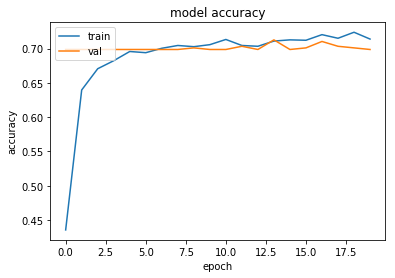

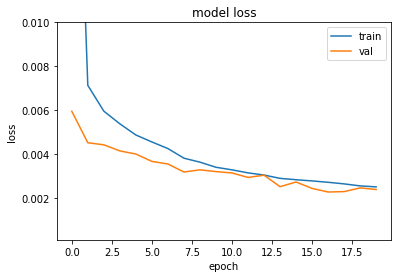

In [114]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(1e-4, 1e-2)
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [19]:
X_test, _ = load(test=True)

ImageId    1783
Image      1783
dtype: int64


In [49]:
X_test.shape

(1783, 96, 96, 1)

In [24]:
X_test=X_test.reshape(-1, 96, 96, 1)

In [25]:
X_test.shape

(1783, 96, 96, 1)

In [118]:
#model.load_weights("CNN_500-90-30_v2.h5")
y_test = model.predict(X_test)
print(y_test.shape)

(1783, 30)


In [119]:
df_idlookup = pd.read_csv('../Facial Keypoints/IdLookupTable.csv')
val_reqrd = df_idlookup[["ImageId", "FeatureName"]]
val_reqrd.head()

,ImageId,FeatureName
0,1,left_eye_center_x
1,1,left_eye_center_y
2,1,right_eye_center_x
3,1,right_eye_center_y
4,1,left_eye_inner_corner_x


In [120]:
y_res = []
j = 0
k = 0
m = 0
for i in range(1, 1784):
    img = np.array(val_reqrd[val_reqrd["ImageId"]==i])
    if img.shape[0] == 30:
        y_res += list(y_test[i-1,:])
        j += 30
    else:
        slice_img = y_test[i-1, :]
        y_res += [slice_img[j] for j in range(30) if columns[j] in img[:, 1]]
        k += len([slice_img[j] for j in range(30) if columns[j] in img[:, 1]])
y_res = np.array(y_res)
y_res.shape

(27124,)

In [121]:
result_dict = {
    "RowId": range(1,27125),
    "Location": y_res%96
}
result_df = pd.DataFrame(result_dict, )
result_df.to_csv("Seavey_base_500-90-30_v4.csv", index=False, columns=["RowId", "Location"])

In [122]:
result_df.head(10)

,Location,RowId
0,0.392675,1
1,95.758842,2
2,95.608833,3
3,95.773376,4
4,0.256816,5
5,95.773781,6
6,0.530233,7
7,95.773537,8
8,95.744621,9
9,95.781235,10


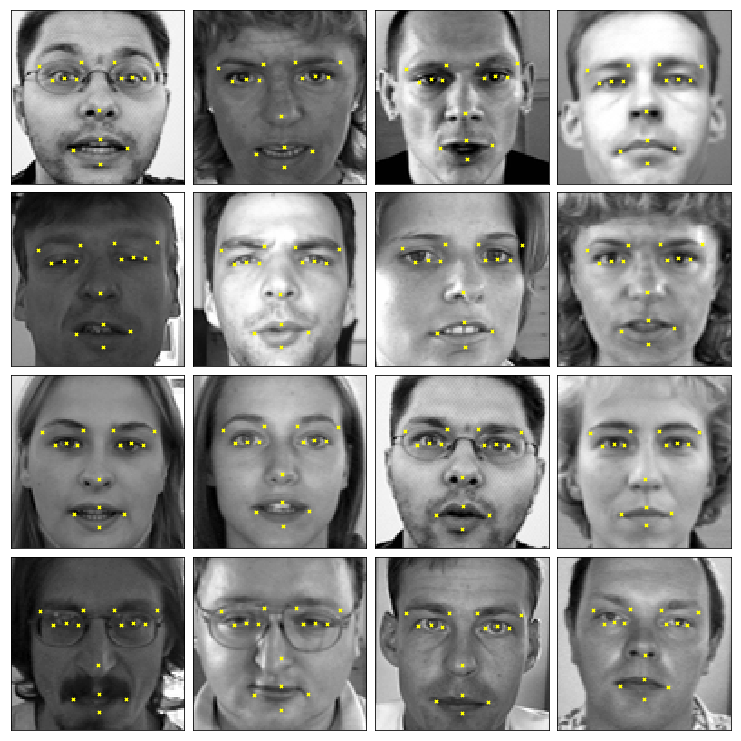

In [123]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()

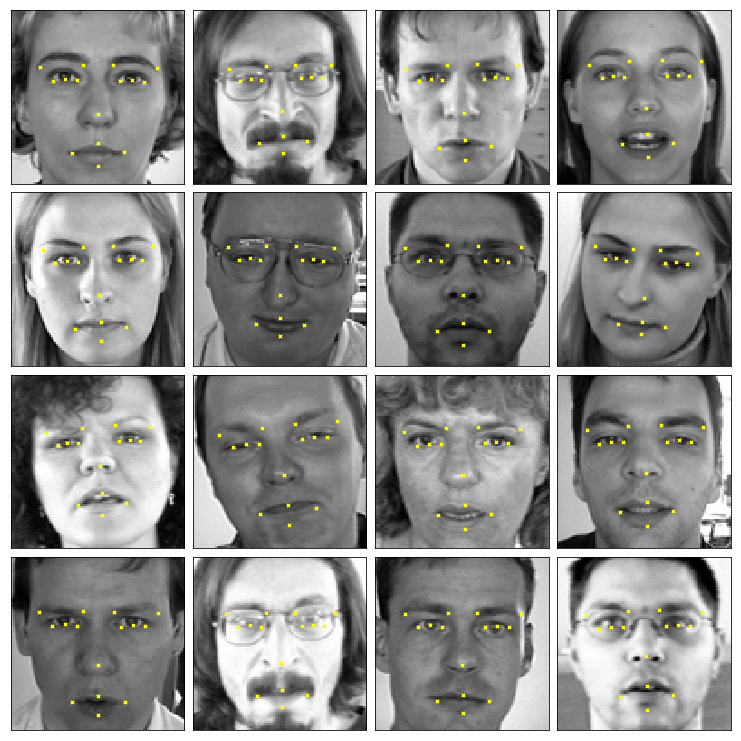

In [124]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i+16], y_test[i+16], axis)

plt.show()